# 26.2 (3) Relax Inc. Take-Home Challenge

In [1]:
# load basic libraries
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import r2_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold,cross_validate,GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression


from scipy.stats import t
from scipy import stats

from numpy.random import seed
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
%matplotlib inline

In [2]:
df = pd.read_csv('takehome_users.csv', encoding='ISO-8859–1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df.shape


(12000, 10)

In [4]:
df.dtypes


object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [5]:
# convert creation_time datatype to int64
df.creation_time = pd.to_datetime(df.creation_time, format='%Y-%m-%d')
df.creation_time = df.creation_time.astype(np.int64)

In [6]:
df2= pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
# convert time_stamp to datetime type
df2.time_stamp = pd.to_datetime(df2.time_stamp, format='%Y-%m-%d')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [10]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:

# calculte total visit time within 7 days
new_df2 = df2.groupby('user_id').rolling('7D', on='time_stamp').visited.sum()

In [12]:
new_df2.head()

user_id  time_stamp         
1        2014-04-22 03:53:30    1.0
2        2013-11-15 03:45:04    1.0
         2013-11-29 03:45:04    1.0
         2013-12-09 03:45:04    1.0
         2013-12-25 03:45:04    1.0
Name: visited, dtype: float64

In [13]:
new_df2 = pd.DataFrame(new_df2).reset_index()


In [14]:
new_df2.head(15)

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
5,2,2013-12-31 03:45:04,2.0
6,2,2014-01-08 03:45:04,1.0
7,2,2014-02-03 03:45:04,1.0
8,2,2014-02-08 03:45:04,2.0
9,2,2014-02-09 03:45:04,3.0


In [15]:
new_df2.user_id.unique()

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

In [16]:
len(new_df2[new_df2.visited>=3].user_id.unique())


1602

In [17]:
new_df2['adopted_user'] = np.where(new_df2.visited>=3, 1,0)


In [18]:
df_adopted = pd.DataFrame(new_df2.groupby('user_id')['adopted_user'].sum()>=1).reset_index()


In [19]:
df_adopted.head(5)


,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [20]:
df_adopted.adopted_user = df_adopted.adopted_user.astype('int64')


In [21]:
df_adopted.head()


,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [22]:

# join df and df_adopted on user_id and object id
final_df = df.join(df_adopted.set_index('user_id'), on ='object_id')

In [23]:
# check if there's missing value in adopted_user
final_df.adopted_user.value_counts(dropna=False)

0.0    7221
NaN    3177
1.0    1602
Name: adopted_user, dtype: int64

In [24]:
final_df.dtypes


object_id                       int64
creation_time                   int64
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                  float64
dtype: object

In [25]:
# check missing value's data type. as they are all float type so we don't need to do anything
final_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [26]:
# fill NaN with 0
final_df.invited_by_user_id.fillna(0, inplace=True)

In [27]:
# change invited_by_user_id to binary value(1, 0)

final_df.invited_by_user_id = final_df.invited_by_user_id.apply(lambda x: 1 if x != 0
                                                               else x).astype('int64')

In [28]:
final_df.invited_by_user_id.value_counts()


1    6417
0    5583
Name: invited_by_user_id, dtype: int64

In [29]:
# we will not use variable email and name for model building
final_df = final_df.drop(['object_id', 'email', 'name'],axis=1)

In [30]:
final_df.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1398138810000000000,GUEST_INVITE,1.398139e+09,1,0,11,1,0.0
1,1384487104000000000,ORG_INVITE,1.396238e+09,0,0,1,1,1.0
2,1363734892000000000,ORG_INVITE,1.363735e+09,0,0,94,1,0.0
3,1369123768000000000,GUEST_INVITE,1.369210e+09,0,0,1,1,0.0
4,1358417660000000000,GUEST_INVITE,1.358850e+09,0,0,193,1,0.0


In [31]:
final_df.isnull().sum()

creation_time                    0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted_user                  3177
dtype: int64

In [32]:
final_df.adopted_user.fillna(0, inplace=True)


In [33]:
final_df = final_df.dropna()

In [34]:
final_df.describe()


,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,8.823000e+03,8.823000e+03,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000
mean,1.374163e+18,1.379279e+09,0.252295,0.151989,142.572254,0.541312,0.181571
std,1.866134e+16,1.953116e+07,0.434354,0.359031,124.176422,0.498319,0.385512
min,1.338425e+18,1.338452e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.358549e+18,1.363195e+09,0.000000,0.000000,30.000000,0.000000,0.000000
50%,1.376086e+18,1.382888e+09,0.000000,0.000000,109.000000,1.000000,0.000000
75%,1.391041e+18,1.398443e+09,1.000000,0.000000,239.000000,1.000000,0.000000
max,1.401494e+18,1.402067e+09,1.000000,1.000000,416.000000,1.000000,1.000000


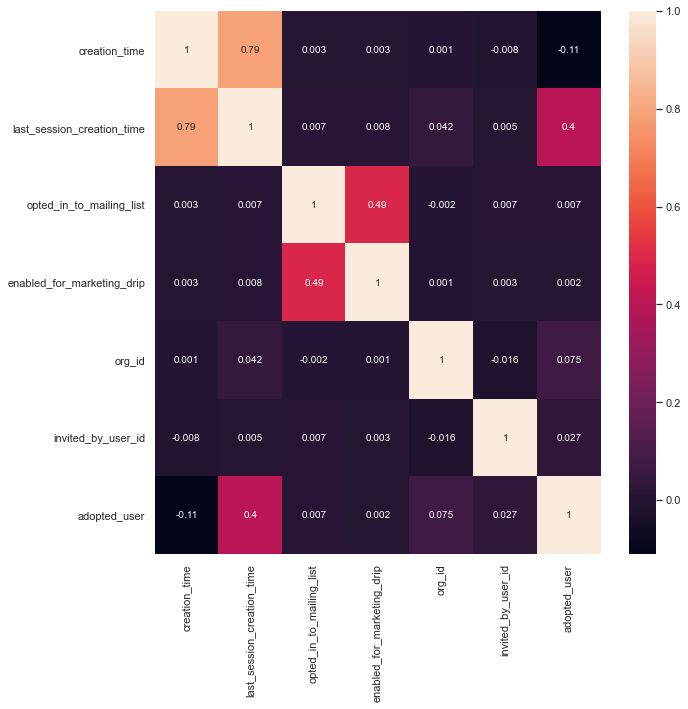

In [35]:
plt.figure(figsize=(10, 10))

sns.heatmap(round(final_df.corr(),3), annot=True)
plt.show()

In [36]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               8823 non-null   int64  
 1   creation_source             8823 non-null   object 
 2   last_session_creation_time  8823 non-null   float64
 3   opted_in_to_mailing_list    8823 non-null   int64  
 4   enabled_for_marketing_drip  8823 non-null   int64  
 5   org_id                      8823 non-null   int64  
 6   invited_by_user_id          8823 non-null   int64  
 7   adopted_user                8823 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 620.4+ KB


In [37]:
final_df[['adopted_user','invited_by_user_id','org_id','enabled_for_marketing_drip','opted_in_to_mailing_list','creation_source']]=final_df[['adopted_user','invited_by_user_id','org_id','enabled_for_marketing_drip','opted_in_to_mailing_list','creation_source']].astype("category")

In [38]:
final_df.creation_source.unique()

[GUEST_INVITE, ORG_INVITE, SIGNUP, PERSONAL_PROJECTS, SIGNUP_GOOGLE_AUTH]
Categories (5, object): [GUEST_INVITE, ORG_INVITE, SIGNUP, PERSONAL_PROJECTS, SIGNUP_GOOGLE_AUTH]

In [39]:
final_df.creation_source = final_df.creation_source.map({'GUEST_INVITE':0,'ORG_INVITE':1,'SIGNUP':2,'PERSONAL_PROJECTS':3,'SIGNUP_GOOGLE_AUTH':4})

In [40]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   creation_time               8823 non-null   int64   
 1   creation_source             8823 non-null   category
 2   last_session_creation_time  8823 non-null   float64 
 3   opted_in_to_mailing_list    8823 non-null   category
 4   enabled_for_marketing_drip  8823 non-null   category
 5   org_id                      8823 non-null   category
 6   invited_by_user_id          8823 non-null   category
 7   adopted_user                8823 non-null   category
dtypes: category(6), float64(1), int64(1)
memory usage: 290.9 KB


In [41]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns=['adopted_user']),
                                                    final_df.adopted_user, test_size=0.3, 
                                                    random_state=47)

In [42]:
print(X_test)

             creation_time creation_source  last_session_creation_time  \
4542   1386879704000000000               2                1.386966e+09   
2064   1354994099000000000               2                1.355080e+09   
6110   1385582115000000000               1                1.386619e+09   
9194   1363883737000000000               1                1.401641e+09   
8345   1361043970000000000               2                1.361044e+09   
...                    ...             ...                         ...   
11924  1370554489000000000               1                1.370554e+09   
8594   1349684536000000000               1                1.370766e+09   
5055   1400790206000000000               1                1.400790e+09   
6391   1379108622000000000               2                1.380318e+09   
4022   1372550022000000000               1                1.372550e+09   

      opted_in_to_mailing_list enabled_for_marketing_drip org_id  \
4542                         1             

In [43]:
print(y_test)

4542     0.0
2064     0.0
6110     0.0
9194     1.0
8345     0.0
        ... 
11924    0.0
8594     1.0
5055     0.0
6391     0.0
4022     0.0
Name: adopted_user, Length: 2647, dtype: category
Categories (2, float64): [0.0, 1.0]


In [44]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


rfc = RandomForestClassifier(random_state = 10)
rfecv = RFECV(estimator = rfc,step = 1, cv = StratifiedKFold(10),scoring ='accuracy')
rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=10), scoring='accuracy')

In [45]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


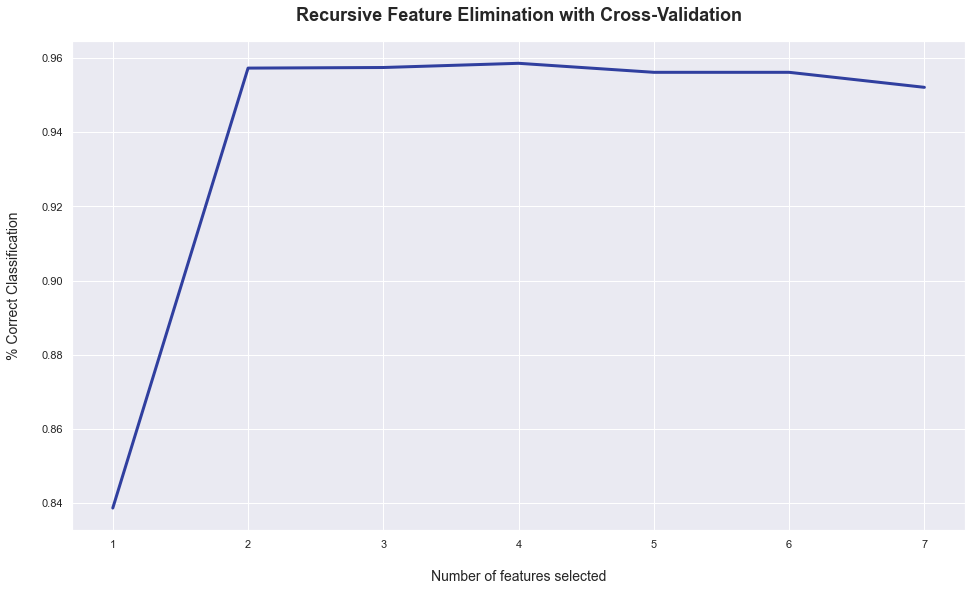

In [46]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

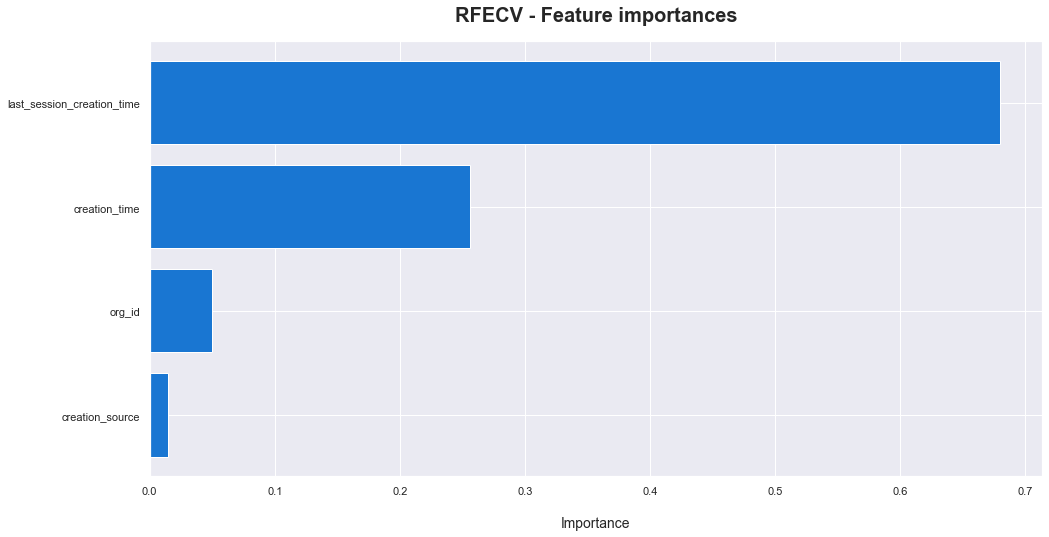

In [50]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=True)

plt.figure(figsize=(16, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [51]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
model.score(X_train,y_train)

0.9998380829015544

In [53]:
model.score(X_test,y_test)

0.9591990933131848

In [54]:
y_pred = model.predict(X_test)

In [55]:
model.score(X_test,y_test)

0.9591990933131848

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
cm =confusion_matrix(y_test,y_pred)
cm

array([[2143,   13],
       [  95,  396]], dtype=int64)

Text(66.5, 0.5, 'True')

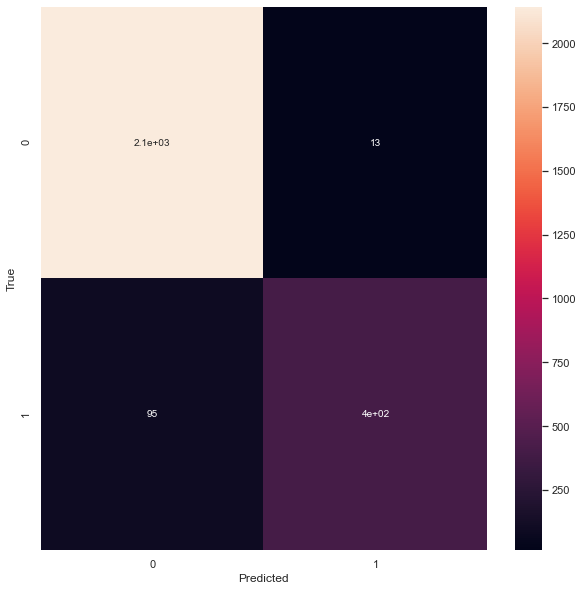

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [58]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2156
         1.0       0.97      0.81      0.88       491

    accuracy                           0.96      2647
   macro avg       0.96      0.90      0.93      2647
weighted avg       0.96      0.96      0.96      2647



Tend to slightly overestimate negative (non-active)

The random forest identified last_session_creation_time, creation_time & org_id are the most important factors for prediction of adopted user. 

The accuracy of random forest is about 95.9% for the validation set.